# DESAFIO 1

## Paso 1. Abrir el dataset SATscore2015.csv. Investigar la estructura de los datos y responder

### 1. ¿Qué es lo que describen los datos?

### 2. ¿Se ve algún problema en los datos? ¿Están completos?

### 3. ¿Qué representan las filas? ¿Y las columnas?

### 4. Creá un diccionario de datos para el dataset en formato texto. En el mismo deben describirse las diferentes variables, su nivel de medición y dar alguna(s) medida(s) descriptiva(s) de cada una.

## Paso 2. Cargar el dataset

### 5. Cargá los datos en una lista de listas

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

%matplotlib inline

In [163]:
df = pd.read_csv("./SATscore2015.csv")

### 6. Visualizá (print) los datos

In [164]:
df.head(3)

,State,Mathematics,Writing,Total SAT score
0,Alabama,538,533,1616
1,Alaska,503,482,1494
2,Arizona,527,502,1552


### 7. Extraé una lista de las etiquetas de los datos y removela del dataset

### 8. Creá una lista con los nombres de los Estados del dataset. (Pista: usá la lista de etiquetas como índice)

In [165]:
lista_estados = list(df['State'].values)
lista_estados[0:3]

['Alabama', 'Alaska', 'Arizona']

### 9. Imprimí los tipos de cada columna

In [166]:
df.dtypes

State              object
Mathematics        object
Writing             int64
Total SAT score     int64
dtype: object

### 10. ¿Hay algún tipo que deba ser cambiado? Si es así, transformalo al tipo que corresponde

In [167]:
df.loc[df.Mathematics == ".","Mathematics"] = 0
df["Mathematics"] = df.Mathematics.astype(np.int64)
df.dtypes

State              object
Mathematics         int64
Writing             int64
Total SAT score     int64
dtype: object

In [158]:
#Remplazo la fila que puse en 0 por la media
df.loc[df.Mathematics == 0,"Mathematics"] = np.int(np.mean(df.loc[df.Mathematics != 0,"Mathematics"]))
df.loc[df.Mathematics == 0] 

,State,Mathematics,Writing,Total SAT score


### 11. Creá un diccionario para cada columna vinculando cada Estado con su respectivo valor en esa columna

In [159]:
dictionary_math = {k:v for k,v in zip(df["State"].values,df["Mathematics"].values)}
dictionary_writing = {k:v for k,v in zip(df["State"].values,df["Writing"].values)}
dictionary_sat_score = {k:v for k,v in zip(df["State"].values,df["Total SAT score"].values)}

### 12. Creá un diccionario para cada una de las columnas numéricas

## Paso 3. Describir los datos

### 13. Imprimí el máximo y el mínimo de cada columna

In [160]:
print(np.max(df,axis=0))
print("\n---------------------------\n")
print(np.min(df,axis=0))

State              Wyoming
Mathematics            616
Writing                842
Total SAT score       1802
dtype: object

---------------------------

State              Alabama
Mathematics            388
Writing                412
Total SAT score       1214
dtype: object


### 14. Escribí una función que use solo lists comprehensions (no for loops) para calcular el Desvío Estándar. Imprimí el Desvío Estándar de cada columna numérica.

In [161]:
def desvio_estandar(lista):
    media = np.mean(lista)
    sum_aux = [(x-media)**2 for x in lista]
    return np.sqrt(sum(sum_aux)/len(lista)).round(decimals=2)

print("Media de Math: \t \t \t {}".format(np.mean(df['Mathematics'].values).round(decimals=2)))
print("Mediana de Math: \t \t {}".format(np.median(df['Mathematics'].values).round(decimals=2)))
print("Moda de Math: \t \t \t {}".format(stats.mode(df['Mathematics'].values).mode))
print("Desvio estandar de Math: \t {}".format(float(desvio_estandar(df['Mathematics'].values)),2))
print("\n----------------------------------------\n")
print("Media de Writing: \t \t {}".format(np.mean(df['Writing'].values).round(decimals=2)))
print("Mediana de Writing: \t \t {}".format(np.median(df['Writing'].values).round(decimals=2)))
print("Moda de Writing: \t \t {}".format(stats.mode(df['Writing'].values).mode))
print("Desvio estandar de Writing: \t {}".format(float(desvio_estandar(list(df['Writing'].values))),2))


Media de Math: 	 	 	 532.26
Mediana de Math: 	 	 527.0
Moda de Math: 	 	 	 [494]
Desvio estandar de Math: 	 51.36

----------------------------------------

Media de Writing: 	 	 520.94
Mediana de Writing: 	 	 507.0
Moda de Writing: 	 	 [478]
Desvio estandar de Writing: 	 65.11


## Paso 4. Visualizar los datos

### 15. Usando MatPlotLib y PyPlot, graficá la distribución del Rate. ¿Qué tipo de gráfico le correspondería? ¿Por qué?

### 16. Graficá la distribución de la variable *Math*

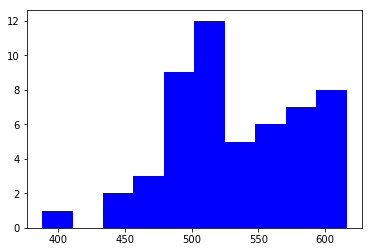

In [102]:
plt.hist(df["Mathematics"].values, color = 'b' , bins=10)
plt.show()

### 17. Graficá la distribución de la variable *Writing*

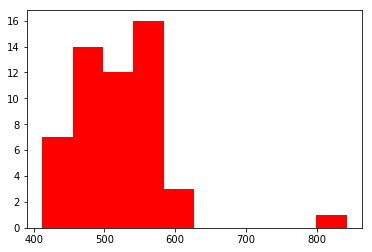

In [103]:
plt.hist(df["Writing"].values, color = 'r' , bins=10)
plt.show()

### 18. ¿Cuál sería un supuesto acerca de la distribución que genera los datos?

### 19. ¿Qué podrías decir de ese supuesto en relación a los datos analizados?

## BONUS: Complementá el análisis

### 20. Elegí fuentes de datos adicionales (pobreza, ingresos, población, migrantes, etc.). Analiza y grafica los datos de forma conjunta para observar posibles relaciones. 
#### Pista: chequear consignas para ir a los links con datos

In [140]:
immigrants = pd.read_csv('Immigrants_martin.csv')
print(immigrants.head(3))
immigrants.info()
#sns.pairplot(immigrants)

           State  Immigrants
0        Wyoming       21000
1      Wisconsin      273000
2  West Virginia       28000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
State         51 non-null object
Immigrants    51 non-null int64
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [141]:
pop_and_desity = pd.read_csv('PopulationAndDensity_martin.csv')
print(pop_and_desity.head(3))
pop_and_desity.info()
#sns.pairplot(pop_and_desity)

     State  Density  Population
0  Alabama       37     4858979
1   Alaska        0      738432
2  Arizona       23     6828065
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
State         50 non-null object
Density       50 non-null int64
Population    50 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [142]:
gini = pd.read_csv('GINI2015_martin.csv')
print(gini.head(3))
gini.info()
#sns.pairplot(gini)

     State   Gini
0  Alabama  0.476
1   Alaska  0.418
2  Arizona  0.468
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State    50 non-null object
Gini     50 non-null float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


In [143]:
gdp = pd.read_csv('GDP2016_martin.csv')
print(gdp.head(3))
gdp.info()
#sns.pairplot(gdp)

     State  GDP2016
0  Alabama   204861
1   Alaska    50713
2  Arizona   302952
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
State      51 non-null object
GDP2016    51 non-null int64
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [148]:
datos_total = pd.merge(pd.merge(pd.merge(pd.merge(immigrants,pop_and_desity,on='State'), gini,on='State'), gdp, on='State'),df,on='State')
datos_total.head(3)

,State,Immigrants,Density,Population,Gini,GDP2016,Mathematics,Writing,Total SAT score
0,Wyoming,21000,2,586107,0.427,37858,586,562,1737
1,Wisconsin,273000,41,5771337,0.440,309536,605,575,1771
2,West Virginia,28000,29,1844128,0.455,73374,497,495,1501


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


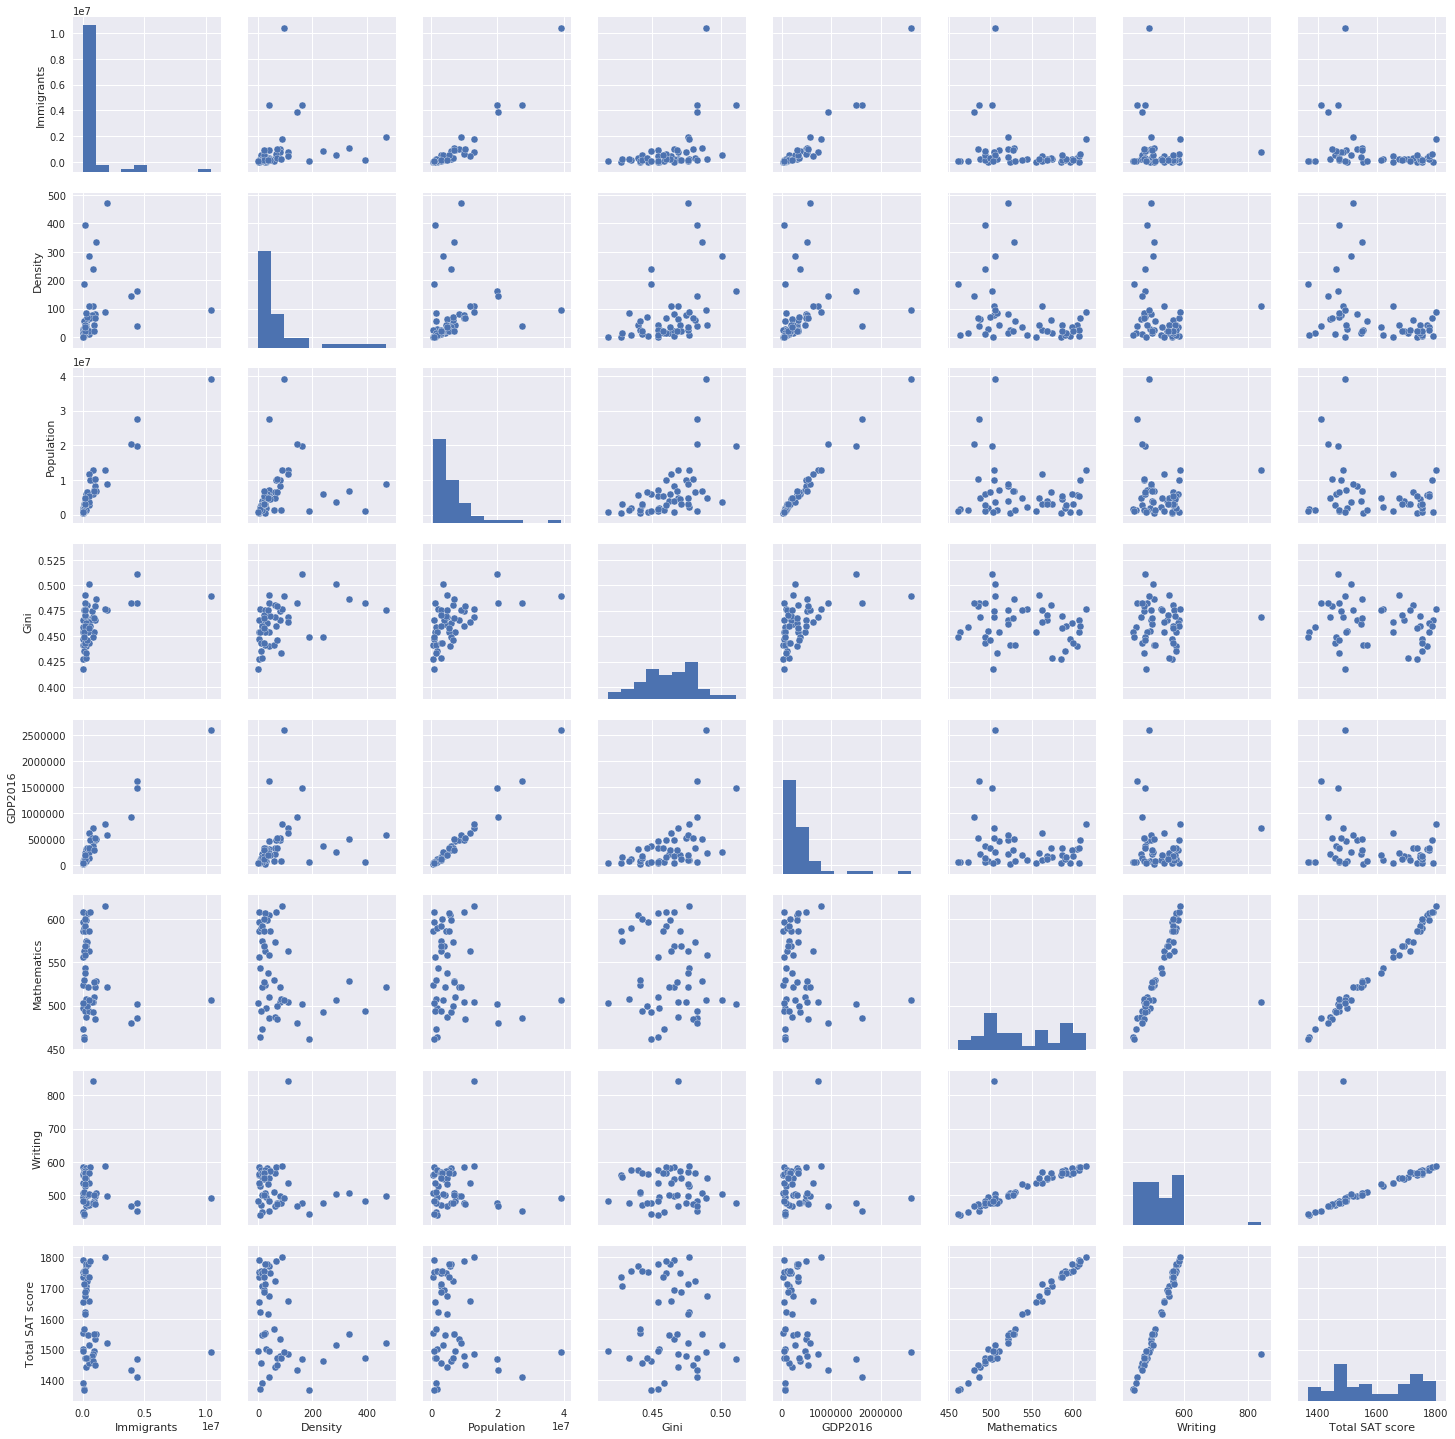

In [149]:
sns.pairplot(datos_total)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


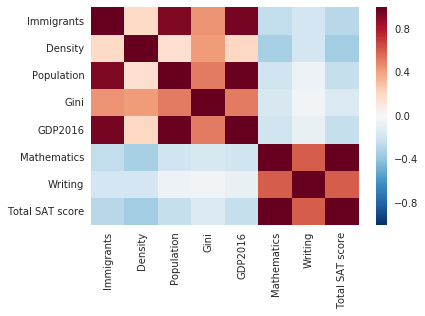

In [152]:
corr = datos_total.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 21. A partir de las variables seleccionados, ¿observas una mayor incidencia de alguna de las variables y la performance del estado en alguno de los scores? ¿Consideras importante inferir alguna conclusión para orientar a los directivos de la universidad y/o profundizar el análisis?  

### 22. Graficá algunos scatterplots. Usá algún gráfico de Seaborn para presentar scatterplots múltiples

### 23. ¿Hay alguna relación interesante para mencionar? ¿Cuál? ¿Qué tipo de relación es?

### 24. Creá boxplots para cada variable (según corresponda)